**Importing all Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as mns
from pandas_visual_analysis import VisualAnalysis
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\91701\\OneDrive\\Desktop\\Train.csv')

**Item_Identifier: Unique product ID**

**Item_Weight: Weight of product**

**Item_Fat_Content: Whether the product is low fat or not**

**Item_Visibility: The % of total display area of all products in a store allocated to the particular product**

**Item_Type: The category to which the product belongs**

**Item_MRP: Maximum Retail Price (list price) of the product**

**Outlet_Identifier: Unique store ID**

**Outlet_Establishment_Year: The year in which store was established**

**Outlet_Size: The size of the store in terms of ground area covered**

**Outlet_Location_Type: The type of city in which the store is located**

**Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket**

**Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.**

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df.shape

(8523, 12)

# Data Cleaning

**CHECKING FOR NULL OR NAN VALUES**

In [10]:
df.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

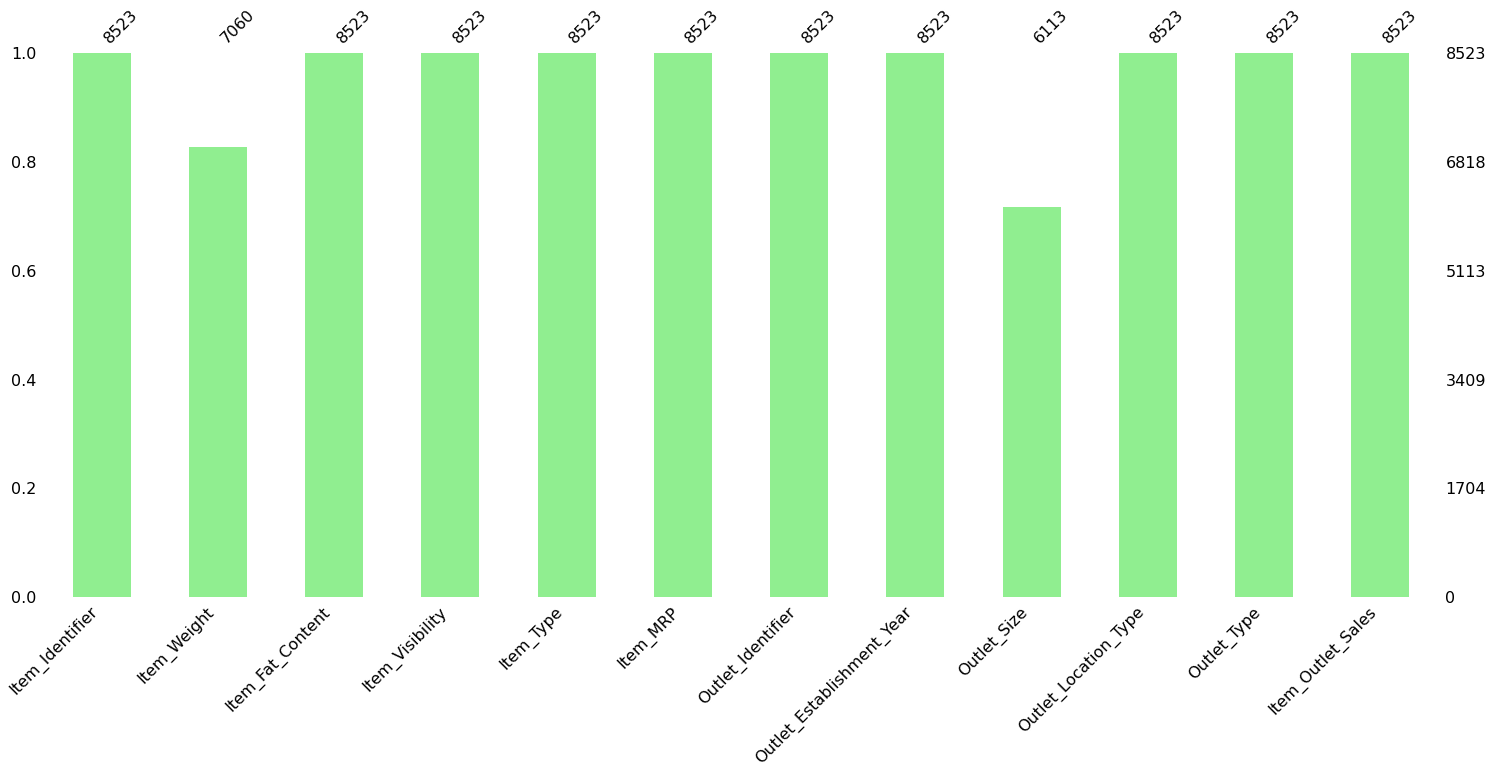

In [12]:
mns.bar(df,color='lightgreen')
plt.show()

In [13]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean()) #replacing the missing values by mean of the remaining values

In [14]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium') #replacing the missing values by 'mode' of that data in a column

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

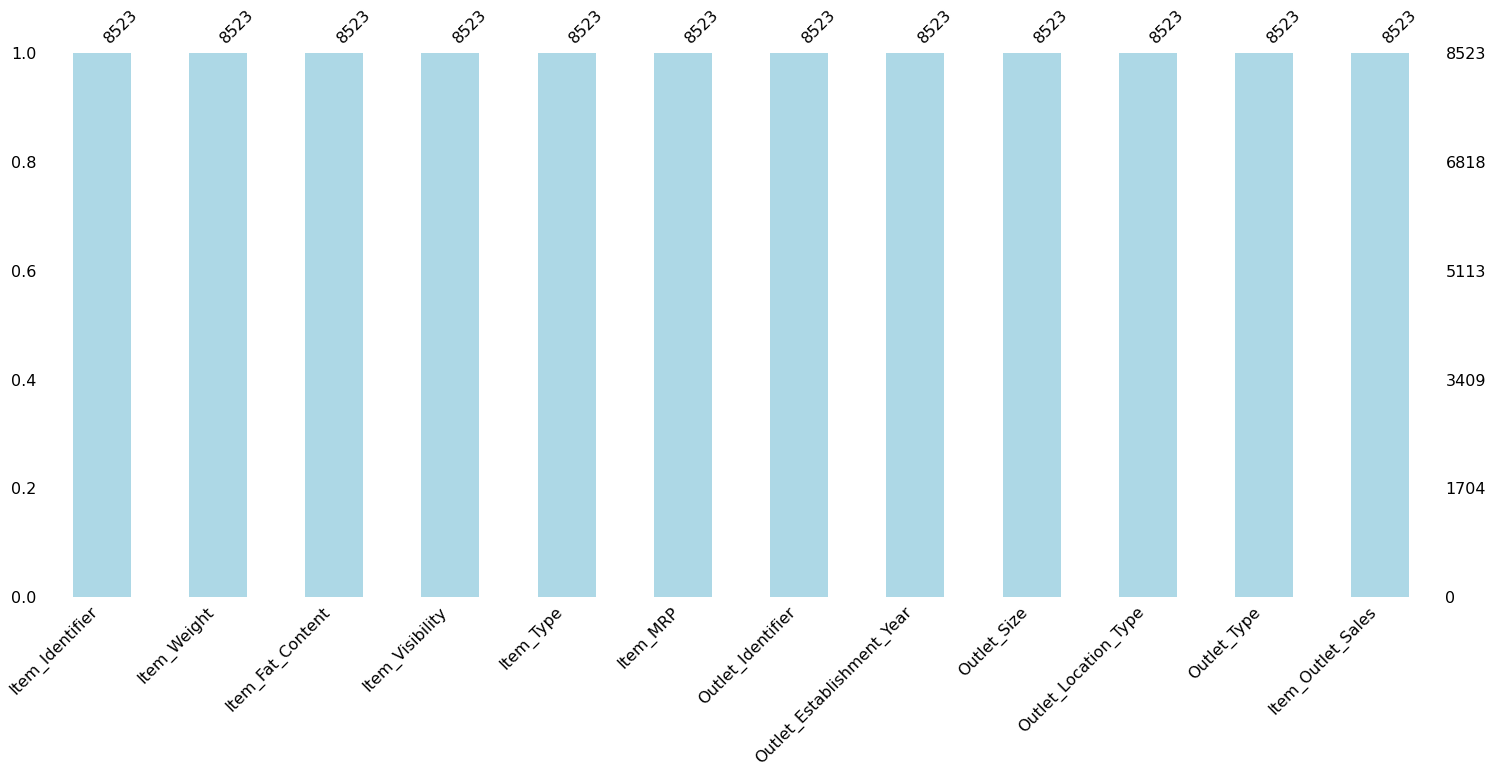

In [17]:
mns.bar(df,color='lightblue')
plt.show()

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
df.shape

(8523, 12)

In [20]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].astype('category')

In [21]:
df['Outlet_Identifier'].unique()

['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019']
Categories (10, object): ['OUT049', 'OUT018', 'OUT010', 'OUT013', ..., 'OUT017', 'OUT046', 'OUT035', 'OUT019']

In [22]:
df.drop(columns = ['Item_Identifier'],inplace=True)

# **EDA(Exploratory Data Analysis)**

In [23]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
VisualAnalysis(df)

In [25]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
LF,316.0,2073.551928,1535.282582,40.6138,729.0510,1797.6600,2990.1078,7503.5660
Low Fat,5089.0,2164.477336,1706.599391,33.2900,826.9236,1765.7016,3057.3536,13086.9648
Regular,2889.0,2235.186702,1727.715941,33.9558,860.2136,1845.5976,3219.8088,12117.5600
low fat,112.0,2087.740737,1747.723146,83.8908,912.1460,1614.2321,2753.4159,9562.2196
reg,117.0,1962.192268,1543.170658,37.9506,798.9600,1492.7236,2821.6604,7833.8028


In [28]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [29]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

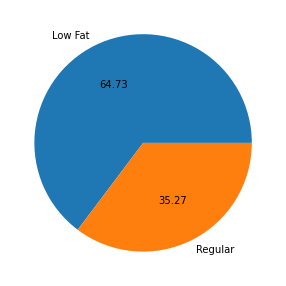

In [30]:
plt.figure(figsize=(15,5))
plt.pie(df['Item_Fat_Content'].value_counts(),labels=df['Item_Fat_Content'].unique(),autopct="%.2f")
plt.show()

**Item_Type**

In [31]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [32]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [33]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [35]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [36]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [37]:
# columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']

**Correlation between the variables**

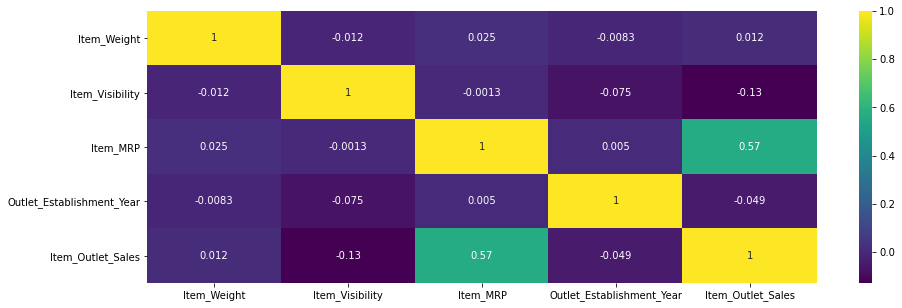

In [38]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

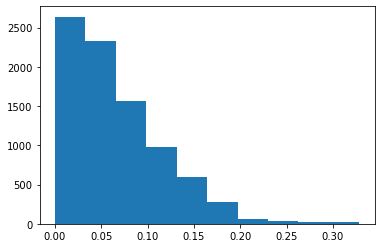

In [39]:
plt.hist(df['Item_Visibility'])
plt.show()

In [40]:
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].count()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Outlet_Sales, dtype: int64

**So we people like less fat content**

In [41]:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].count()

Outlet_Size
High       932
Medium    5203
Small     2388
Name: Item_Outlet_Sales, dtype: int64

**People like Medium Size Content**

In [42]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].count()

Outlet_Location_Type
Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Item_Outlet_Sales, dtype: int64

In [43]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].count()

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Item_Outlet_Sales, dtype: int64

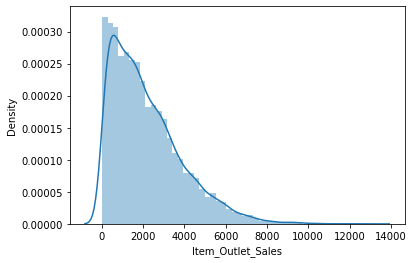

In [44]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

<AxesSubplot:ylabel='Item_Type'>

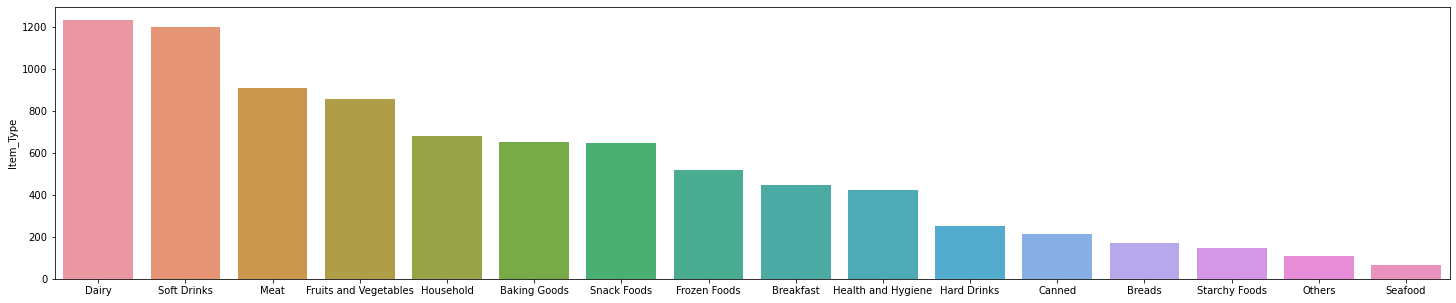

In [45]:
plt.figure(figsize=(25,5))
sns.barplot(df['Item_Type'].unique(),df['Item_Type'].value_counts())

In [46]:
df.groupby('Outlet_Establishment_Year')[['Item_Outlet_Sales']].count()

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,1463
1987,932
1997,930
1998,555
1999,930
2002,929
2004,930
2007,926
2009,928


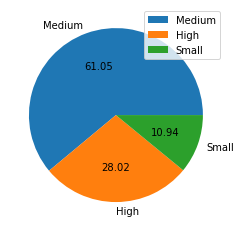

In [47]:
plt.pie(df['Outlet_Size'].value_counts(),labels=df['Outlet_Size'].unique(),autopct="%.2f")
plt.legend()
plt.show()

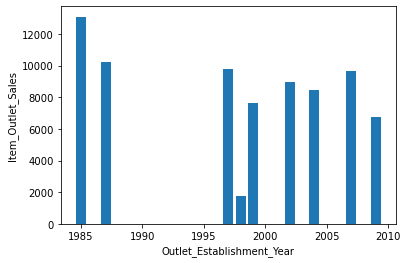

In [48]:
plt.bar(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.show()

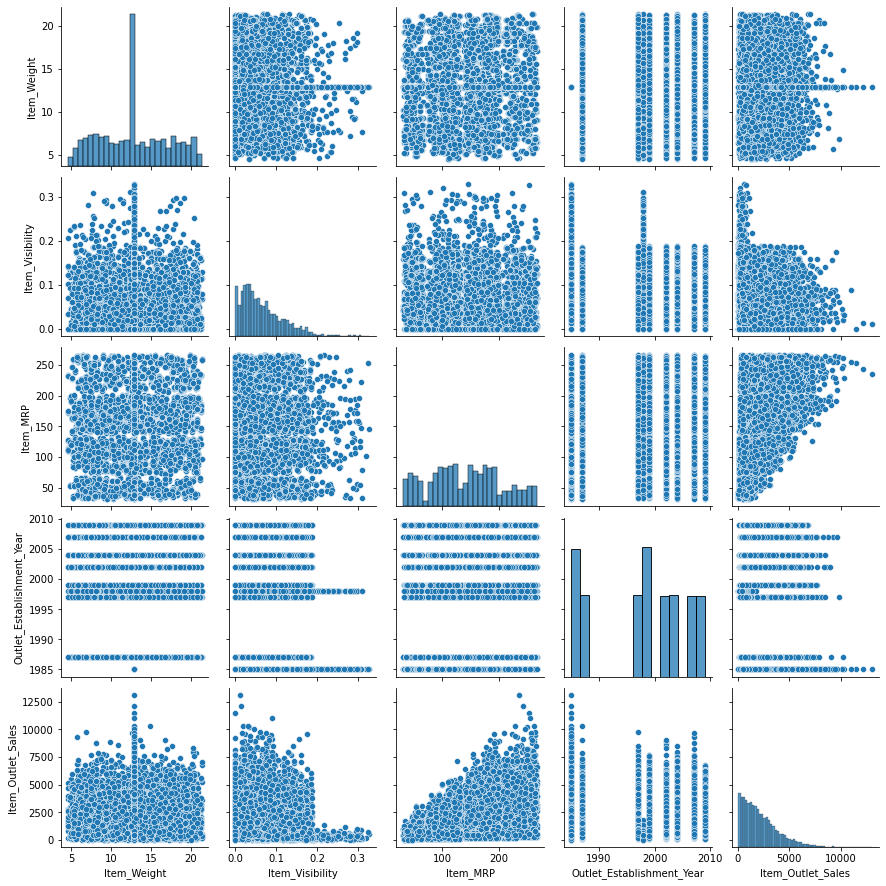

In [49]:
sns.pairplot(df)
plt.show()

In [50]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier','Item_Outlet_Sales','Outlet_Establishment_Year']

<AxesSubplot:>

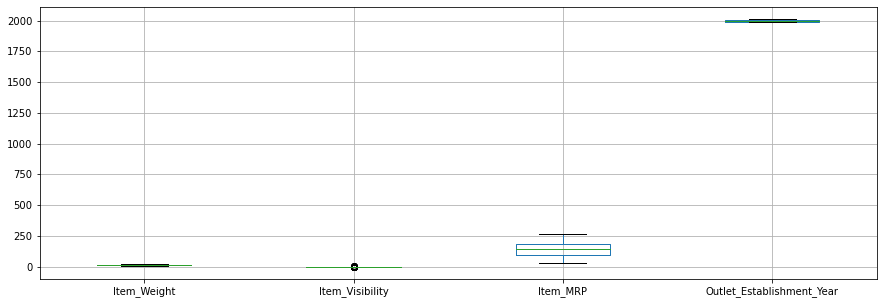

In [52]:
plt.figure(figsize=(15,5))
df.drop(columns='Item_Outlet_Sales').boxplot()

**Converting Categorical columns to Numerical columns by LabelEncoder**

In [53]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [54]:
columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']

In [55]:
df['Item_Fat_Content'] = label.fit_transform(df['Item_Fat_Content'])

In [56]:
label.transform(['Low Fat','Regular'])

array([0, 1])

In [57]:
df['Item_Type'] = label.fit_transform(df['Item_Type'])

In [58]:
label.transform(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Frozen Foods', 'Hard Drinks', 'Canned',
       'Starchy Foods', 'Breads', 'Others', 'Seafood'])

array([ 4, 14, 10,  9,  0, 13,  6,  2,  8,  5,  7,  3, 15,  1, 11, 12])

In [59]:
df['Outlet_Size'] = label.fit_transform(df['Outlet_Size'])

In [60]:
label.transform(['Small','Medium','High'])

array([2, 1, 0])

In [61]:
df['Outlet_Location_Type'] = label.fit_transform(df['Outlet_Location_Type'])

In [62]:
label.transform(['Tier 1','Tier 2','Tier 3'])

array([0, 1, 2])

In [63]:
df['Outlet_Type'] = label.fit_transform(df['Outlet_Type'])

In [64]:
label.transform(['Supermarket Type1', 'Supermarket Type2'])

array([1, 2])

In [65]:
df['Outlet_Identifier'] = label.fit_transform(df['Outlet_Identifier'])

In [66]:
label.transform(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019'])

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4])

**Dividing into train and test**

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=67)

**Feature Scaling**

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scale = MinMaxScaler()

In [72]:
x_train1 = scale.fit_transform(x_train)
x_test1 = scale.fit_transform(x_test)

# **Model Building**

**Multiple LinearRegression**

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [74]:
model = LinearRegression()

In [75]:
model.fit(x_train1,y_train)

LinearRegression()

In [76]:
y_pred_test = model.predict(x_test1)

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(y_test,y_pred_test)

0.516897300206172

In [79]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

1237.546386251243

**Ridge and Lasso Regression**

In [80]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train1,y_train)
y_pred_test = model.predict(x_test1)
r2_score(y_test,y_pred_test)

0.5168269549829079

In [81]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

1237.6364833548635

In [82]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)
r2_score(y_test,y_pred_test)

0.5163718440613971

In [83]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

1238.2192241674975

**Decision Tree Regressor**

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
model = DecisionTreeRegressor()

In [86]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [87]:
y_pred_test = model.predict(x_test)

In [88]:
r2_score(y_test,y_pred_test)

0.2254306443476225

In [89]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

1567.0105108522705

**Random forest Regressor**

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
model = RandomForestRegressor()

In [92]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [93]:
y_pred_test = model.predict(x_test)

In [94]:
r2_score(y_test,y_pred_test)

0.5660217890013286

In [95]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

1172.9397830086034

**K Nearest Neighbors Regressor**

In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
model = KNeighborsRegressor()

In [98]:
model.fit(x_train1,y_train)

KNeighborsRegressor()

In [99]:
y_pred_test = model.predict(x_test1)

In [100]:
r2_score(y_test,y_pred_test)

0.5500468571701953

In [101]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

1194.3329082467071

**Support Vector Machine**

In [102]:
from sklearn.svm import SVR

In [103]:
model = SVR(kernel="poly")

In [104]:
model.fit(x_train1,y_train)

SVR(kernel='poly')

In [105]:
y_pred_test = model.predict(x_test1)
r2_score(y_test,y_pred_test)

0.5063389065052343

In [106]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

1250.9968164570644

**Adaboost Regressor**

In [107]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)
r2_score(y_test,y_pred_test)

0.5150957457442046

In [108]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

1239.851726864156

**Gradient Boost**

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)
r2_score(y_test,y_pred_test)

0.6037988055688313

In [110]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

1120.726508229579